In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time 
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=681ead3c0bdb02109c4113d653194a6d


In [3]:
#create a set of random latitude and longitude cominations
lats= np.random.uniform(low= -90.000, high=90.000, size= 1500)
longs= np.random.uniform(low= -180.000, high= 180.000, size= 1500)
lats_longs = zip(lats, longs)

lats_longs

In [4]:
#add the lats and longs to a list
coordinates = list(lats_longs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [ ]:
# create an empty list to hold the weather data
city_data= []

#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count= 1
set_count= 1

#Loop through all the cities in our list
for i, city in enumerate(cities):

    #group in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")

    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    #add 1 to the record count
    record_count += 1

#run an API request for each of the cities
    try:
        #parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humdity = city_weather["main"]["humidity"]
        city_clouds= city_weather["clouds"]["all"]
        city_wind= city_weather["wind"]["speed"]
        city_country= city_weather["sys"]["country"]

        #convert the date to ISO standard
        city_date= datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

        #append the city information into the city_data list.
        city_data.append({"City":city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humdity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#indicate that the data loading is complete
print("---------------------------------")
print("Data Retrival Complete           ")
print("---------------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | yalvac
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | vostok
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | jipijapa
Processing Record 14 of Set 1 | rungata
City not found. Skipping...
Processing Record 15 of Set 1 | asau
Processing Record 16 of Set 1 | mehamn
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | eresos
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | voh
Proces

In [ ]:
len(city_data)

In [12]:
#Convert the array of dictionaries to a pandas dataframe
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Den Helder,52.9599,4.7593,45.01,67,100,8.01,NL,2022-01-30 15:48:32
1,Kanniyakumari,8.0833,77.5667,79.43,84,1,16.40,IN,2022-01-30 15:48:32
2,Albany,42.6001,-73.9662,17.15,42,32,7.00,US,2022-01-30 15:45:29
3,Zeya,53.7500,127.2667,-4.94,90,82,4.29,RU,2022-01-30 15:48:33
4,Karakol,42.4907,78.3936,15.73,71,90,6.91,KG,2022-01-30 15:48:33
5,Vila Velha,-20.3297,-40.2925,89.55,74,40,8.99,BR,2022-01-30 15:44:12
6,Bluff,-46.6000,168.3333,59.81,93,82,2.44,NZ,2022-01-30 15:48:33
7,Walvis Bay,-22.9575,14.5053,69.10,78,25,7.81,NA,2022-01-30 15:48:34
8,Cape Town,-33.9258,18.4232,96.12,53,0,7.00,ZA,2022-01-30 15:45:07
9,Sorland,67.6670,12.6934,33.66,80,75,14.97,NO,2022-01-30 15:48:34


In [11]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df= city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Den Helder,NL,2022-01-30 15:48:32,52.9599,4.7593,45.01,67,100,8.01
1,Kanniyakumari,IN,2022-01-30 15:48:32,8.0833,77.5667,79.43,84,1,16.40
2,Albany,US,2022-01-30 15:45:29,42.6001,-73.9662,17.15,42,32,7.00
3,Zeya,RU,2022-01-30 15:48:33,53.7500,127.2667,-4.94,90,82,4.29
4,Karakol,KG,2022-01-30 15:48:33,42.4907,78.3936,15.73,71,90,6.91
...,...,...,...,...,...,...,...,...,...
547,Verkhnyaya Toyma,RU,2022-01-30 16:07:49,62.2349,44.9985,7.32,98,78,5.32
548,Khuzhir,RU,2022-01-30 16:07:50,53.1939,107.3397,0.70,93,100,1.70
549,Alyangula,AU,2022-01-30 16:07:50,-13.8483,136.4192,81.25,79,100,17.07
550,Yumen,CN,2022-01-30 16:07:50,40.2833,97.2000,17.35,41,100,8.23


In [14]:
# Create the output file (CSV)
output_data_file= "weather_data/cities.csv"

#export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#extract relevant fields from the dataframe for plotting
lats= city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]


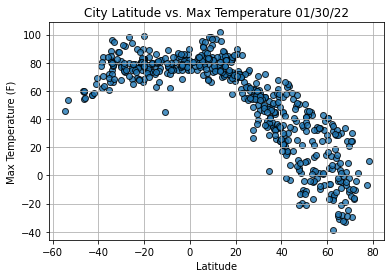

In [24]:
#import time module
import time

#build the scatter plot for latitude vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor= "black", linewidths=1, marker= "o",
            alpha=0.8, label= "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()

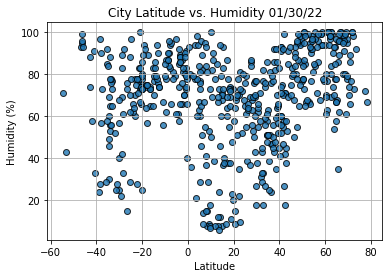

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.show()

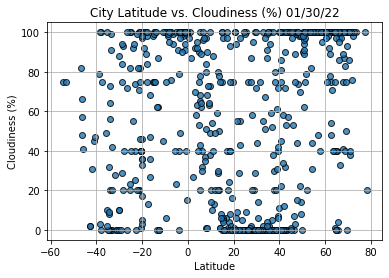

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.show()

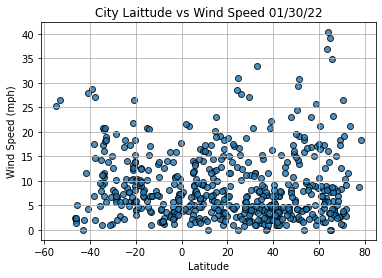

In [22]:
#Build the scatter plots for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths= 1, marker= "o",
            alpha=0.8, label= "Cities")
            
#Incorporate the other graph properties
plt.title(f"City Laittude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

plt.show()